In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np
import re

%matplotlib inline

In [14]:
def parse_runtimes(filename):
    
    op_timer = r'.* (.*) took (.*)ms'
    
    op_map = {'Total':0}
    
    prev_rescale_time = 0
    op_had_rescale = False
    
    def base_op(op_name):
        base_op_name = op_name.split('_', 1)[0]
        base_op_name = base_op_name.split('\t',1)[1]
        return base_op_name
    
    with open(filename) as f:
        lines = [line.strip() for line in f.readlines()]
        for line in lines:
            if re.match(op_timer, line):
                match = re.match(op_timer, line)
                op = match.groups()[0]
                time_ms = int(match.groups()[1])
                time_s = time_ms / 1000.
                base_op_name = base_op(op)
                if base_op_name in op_map:
                    op_map[base_op_name] += time_s
                else: 
                    op_map[base_op_name] = time_s
                    
                if base_op_name == 'Rescale':
                    op_had_rescale = True
                    prev_rescale_time = time_s
                # TODO: Temporary!
                elif op_had_rescale:
                    op_map[base_op_name] -= prev_rescale_time
                    op_had_rescale = False
                    prev_rescale_time = 0
                
    op_keys = op_map.keys()
    op_map['Total'] = 0
    for key in op_keys:
        op_map['Total'] += op_map[key]
                    
                
    return op_map

def plot_op_map(op_map, filename=None):
    sorted_ops = sorted(op_map.items(), key=lambda kv: kv[1])
    print('sorted_ops',sorted_ops)
    
    times = [op[1] for op in sorted_ops]
    ops = [op[0] for op in sorted_ops]
    x_coords = range(len(ops))
    
    plt.bar(x_coords, times, align='center', alpha=0.5)
    plt.xticks(x_coords, ops, rotation=45)
    plt.ylabel('Time (s)')
    plt.title('MobileNetV2 runtime by op')
    
    if filename is not None:
        plt.savefig(filename)
    plt.show()

sorted_ops [('Minimum', 0.15600000000000008), ('Concat', 0.16700000000000004), ('Constant', 0.25000000000000006), ('AvgPool', 2.509), ('Result', 5.679), ('Add', 7.922999999999998), ('Multiply', 9.354999999999999), ('Relu', 318.9279999999999), ('Convolution', 351.8889999999949), ('Total', 696.8559999999948)]


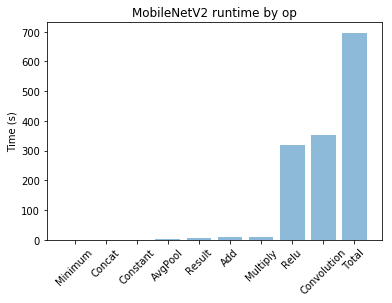

In [15]:
op_map = parse_runtimes('./runtime/699s.txt')
plot_op_map(op_map, 'client_699s.png')

sorted_ops [('Concat', 0.16100000000000006), ('Minimum', 0.1690000000000001), ('Constant', 1.1039999999999999), ('AvgPool', 2.666), ('Result', 5.552), ('Add', 8.758000000000001), ('Multiply', 10.138000000000002), ('Relu', 129.58800000000002), ('Convolution', 341.07500000000715), ('Total', 499.2110000000071)]


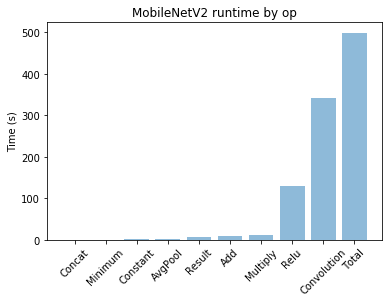

In [16]:
op_map = parse_runtimes('./runtime/clientless_501s.txt')
plot_op_map(op_map, 'clientless_500s.png')

sorted_ops [('Concat', 0.14900000000000005), ('Constant', 0.9360000000000002), ('AvgPool', 1.175), ('Result', 2.691), ('Multiply', 6.6899999999999995), ('Add', 6.9430000000000005), ('BoundedRelu', 91.13999999999997), ('Convolution', 279.3009999999983), ('Total', 389.0249999999982)]


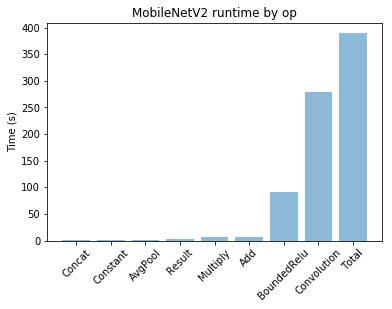

In [17]:
op_map = parse_runtimes('./runtime/clientless_389s_27bit.txt')
plot_op_map(op_map, 'clientless_389s_27bit.png')

sorted_ops [('Concat', 0.08100000000000002), ('Result', 0.525), ('AvgPool', 0.952), ('Constant', 1.1299999999999992), ('Multiply', 4.779), ('Add', 6.881999999999996), ('BoundedRelu', 25.147999999999996), ('Convolution', 262.46599999999023), ('Total', 301.9629999999902)]


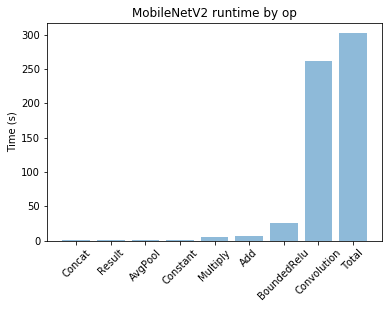

In [18]:
op_map = parse_runtimes('./runtime/clientless300s.txt')
plot_op_map(op_map, 'clientless_300s.png')

sorted_ops [('Concat', 0.07700000000000003), ('Result', 0.487), ('AvgPool', 0.9319999999999999), ('Constant', 0.9990000000000003), ('Multiply', 1.4720000000000004), ('Add', 6.487999999999999), ('Rescale', 24.29599999999911), ('BoundedRelu', 26.609000000000005), ('Convolution', 226.20199999998505), ('Total', 287.56199999998415)]


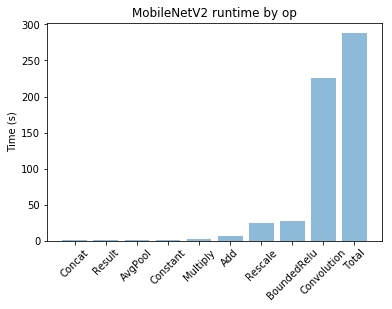

In [19]:
op_map = parse_runtimes('./runtime/clientless_288s.txt')
plot_op_map(op_map, 'clientless_288s.png')

sorted_ops [('Concat', 0.08300000000000003), ('Constant', 0.2890000000000001), ('Result', 0.522), ('AvgPool', 1.012), ('Multiply', 1.246), ('Add', 5.122999999999997), ('Rescale', 23.164000000000392), ('BoundedRelu', 157.59099999999995), ('Convolution', 245.71600000001868), ('Total', 434.746000000019)]


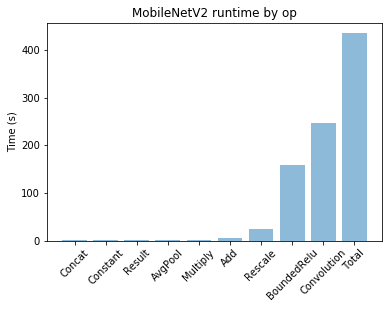

In [20]:
op_map = parse_runtimes('./runtime/client435s.txt')
plot_op_map(op_map, 'client435s.png')